In [5]:
###  This file has the updated API calls with descriptions.
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
import matplotlib.pyplot as plt
import pandas as pd
sys.path.append("../../")
sys.path.append("../")
plt.rcParams["figure.figsize"] = [12, 7]


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Parse through the file, and create a pandas DataFrame database style table to hold all event information

> The gc_event_dataframe is a pandas DataFrame, with the following columns
> ### "DateTime" -> Real world time of gc event
> ### "TimeFromStart_seconds" -> time of beginning of event in seconds
> ### "EventType" -> Either concurrent or stop the world pause
> ### "EventName" -> Specific action from the event. Example : "(pause) Young"
> ### "AdditionalEventInfo" -> Information about the event
> ### "MemoryChange_MB" -> Memory changed, following this patten: before->after(max_heapsize)
> ### "Duration_miliseconds" -> How long it took for the event to occur in miliseconds


In [132]:
files = ["../../datasets/short/ZGC_short.log"]
from src.compare_logs import get_parsed_comparions_from_files 
gc_event_dataframes = get_parsed_comparions_from_files(files)
print(gc_event_dataframes)

[    DateTime TimeFromStart_seconds           EventType              EventName  \
0       None                 0.942               Pause             Mark Start   
1       None                 1.017          Concurrent                   Mark   
2       None                 1.017               Pause               Mark End   
3       None                 1.018          Concurrent   Reset Relocation Set   
4       None                  1.03          Concurrent  Select Relocation Set   
..       ...                   ...                 ...                    ...   
923     None               259.163          Concurrent   Reset Relocation Set   
924     None               259.165          Concurrent  Select Relocation Set   
925     None               259.166               Pause         Relocate Start   
926     None               259.166          Concurrent               Relocate   
927     None               259.166  Garbage Collection                   None   

    AdditionalEventInfo He

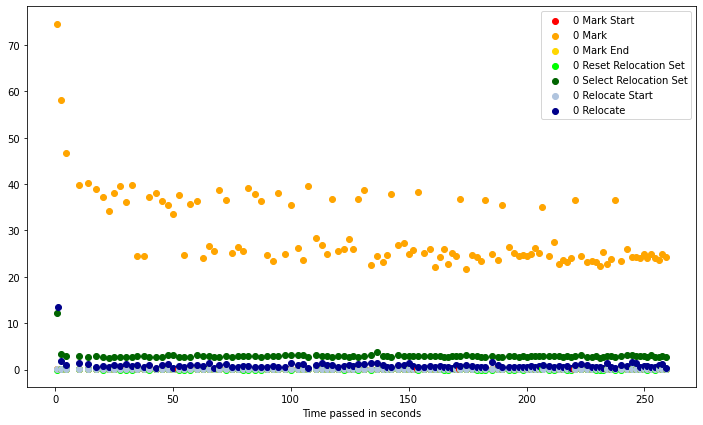

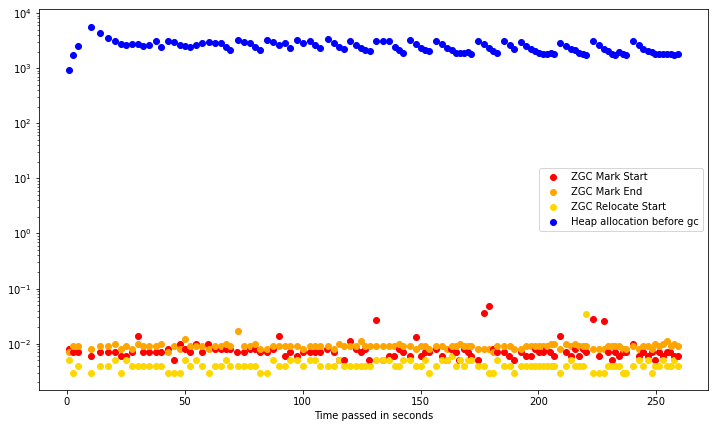

In [153]:
import new_graphing


new_graphing.scatter(gc_event_dataframes, group_by = "EventName")

graph = new_graphing.scatter(gc_event_dataframes,
                         group_by = "EventName", 
                         filter_by = [("EventType" , "Pause")],
                         labels=  ["ZGC"])


_ = new_graphing.scatter(gc_event_dataframes,
                         filter_by = [("HeapBeforeGC", None)],
                         group_by = None,
                         labels = ["Heap allocation before gc"],
                         column = "HeapBeforeGC", ax = graph, colors = ["blue"])

_.set_yscale("log") # HOW TO GENERATE LOGRITHMIC PLOTS

# graph = new_graphing.scatter(gc_event_dataframes,
#                          filter_by = [("HeapAfterGC", None)],
#                          group_by = None,
#                          labels = ["Heap after before gc"],
#                          column = "HeapAfterGC")




### Plot the concurrent and stop the world periods


### Print trends about the events based on Event Type and Name

In [5]:
from src.plot import plot 
plot(gc_event_dataframes, group_by = "EventName", filter_by = [("EventType", "Pause")])
plot(gc_event_dataframes, group_by = "EventName", filter_by = [("EventType", "Concurrent")])

NameError: name 'plot' is not defined

### Compare percentiles for pauses/concurrent phases, general and specific


In [149]:
from new_trends import apply_filter, compare_trends, compare_percentiles
compare_percentiles(apply_filter(gc_event_dataframes, filter_by=[("EventType", "Pause")]))
print("\n\n\n")
compare_trends(apply_filter(gc_event_dataframes, filter_by=[("EventType", "Pause")]), labels = None)

Percentiles| 50%       | 75%       | 90%       | 95%       | 99%       | 99.9%     | 99.99%    | 
------------------------------------------------------------------------------------------------
0          | 146.71 ms | 205.56 ms | 240.14 ms | 250.69 ms | 257.56 ms | 259.16 ms | 259.17 ms | 




 Trends (ms)            | Event Count  | Max Duration | Sum Duration | Mean Duration| Std Dev.     |
----------------------------------------------------------------------------------------------------
0                       | 348          | 259.166      | 48967.628    | 140.7116     | 75.1469      | 


### Average time in seconds per phase  / grouping

In [ ]:
from src.trends import compare_trends
compare_percentiles(gc_event_dataframes, group_by = None ,       filter_by = ("EventType", "Pause"))
compare_percentiles(gc_event_dataframes, group_by = "EventName", filter_by = ("EventType", "Pause"))
compare_percentiles(gc_event_dataframes, group_by = "EventName", filter_by = ("EventType", "Concurrent"))


### Show latency heatmap


In [ ]:
show_heatmap(gc_event_dataframes, group_by = None, filter_by = ("EventType", "Pause"))

### Allocation over time

In [ ]:
plot_line(gc_event_dataframes, group_by = None, filter_by = ("EventType", "Pause"), column = "MemoryChange_MB")

### Frequencies of STW pauses (X ms buckets)